In [2]:
#importem les llibreries que treballarem i creem beautiful object amb 'lxml'
import requests
from bs4 import BeautifulSoup
url = 'https://www.reservoirbirds.com/index.asp'
r = requests.get(url)
html_contents = r.text
bs = BeautifulSoup(html_contents, 'lxml')

In [3]:
#creem la llista amb les dades que ens iteressa, això serà una columna. Igual amb la resta
#Seleccionem, al ser un .asp la web, per tags
especie=[]
tr = bs.find_all('a', {'title':'Filtra por especie'})
for item in tr:    
    result= item.get_text()
    result= result.replace('\n', '')
    result= result.replace('  ', '')
    result= result.replace('\xa0', '')
    especie.append(result)

In [4]:
fecha=[]
tr1 = bs.find_all('a', {'title':'Filtra por fecha'})
for item in tr1:    
    result= item.get_text()
    result= result.replace('\n', '')
    result= result.replace('  ', '')
    result= result.replace('\xa0', '')
    fecha.append(result)

In [5]:
zona=[]
tr2 = bs.find_all('a', {'title':'Localiza la zona en el mapa'})
for item in tr2:    
    result= item.get_text()
    result= result.replace('\n', '')
    result= result.replace('  ', '')
    result= result.replace('\xa0', '')
    zona.append(result)

In [6]:
#Les tres llistes les convertim en un dataframe per exportar csv
import pandas as pd
df_tuples=list(zip(especie,fecha,zona))
df=pd.DataFrame(df_tuples, columns=['Specie', 'Date', 'Location'])

In [11]:
df["Specie"] = df['Specie'].astype('category')

In [14]:
df

,Specie,Date,Location
0,Larus philadelphia,27/03/2020,Málaga (Málaga)
1,Anser brachyrhynchus,26/03/2020,Llanes (Asturies)
2,Branta bernicla,25/03/2020,Parque Natural del Estrecho (Tarifa) (Cádiz)
3,Larus canus,25/03/2020,Rota (Cádiz)
4,Larus glaucoides,24/03/2020,Lekeitio (Vizcaya)
...,...,...,...
70,Motacilla tschutschensis,08/03/2020,Fuerteventura (Las Palmas)
71,Sylvia curruca blythi/halimodendri,08/03/2020,Cádiz (Cádiz)
72,Passer italiae,08/03/2020,Santanyí (Illes Balears)
73,Oenanthe isabellina,08/03/2020,"Santa Cruz de Tenerife, Tenerife (Santa Cruz d..."


[Text(0, 0, 'Acrocephalus paludicola'),
 Text(0, 0, 'Ammomanes cinctura'),
 Text(0, 0, 'Anser brachyrhynchus'),
 Text(0, 0, 'Anthus cervinus'),
 Text(0, 0, 'Anthus hodgsoni'),
 Text(0, 0, 'Ardea alba'),
 Text(0, 0, 'Botaurus stellaris'),
 Text(0, 0, 'Branta bernicla'),
 Text(0, 0, 'Bucephala clangula'),
 Text(0, 0, 'Coracias abyssinicus'),
 Text(0, 0, 'Cygnus atratus'),
 Text(0, 0, 'Elanus caeruleus'),
 Text(0, 0, 'Lanius isabellinus'),
 Text(0, 0, 'Larus canus'),
 Text(0, 0, 'Larus dominicanus'),
 Text(0, 0, 'Larus glaucoides'),
 Text(0, 0, 'Larus glaucoides thayeri'),
 Text(0, 0, 'Larus marinus'),
 Text(0, 0, 'Larus philadelphia'),
 Text(0, 0, 'Larus smithsonianus'),
 Text(0, 0, 'Motacilla tschutschensis'),
 Text(0, 0, 'Oenanthe deserti'),
 Text(0, 0, 'Oenanthe isabellina'),
 Text(0, 0, 'Passer italiae'),
 Text(0, 0, 'Phylloscopus inornatus'),
 Text(0, 0, 'Porzana porzana'),
 Text(0, 0, 'Pycnonotus barbatus'),
 Text(0, 0, 'Spilopelia senegalensis'),
 Text(0, 0, 'Sylvia curruca'),
 Te

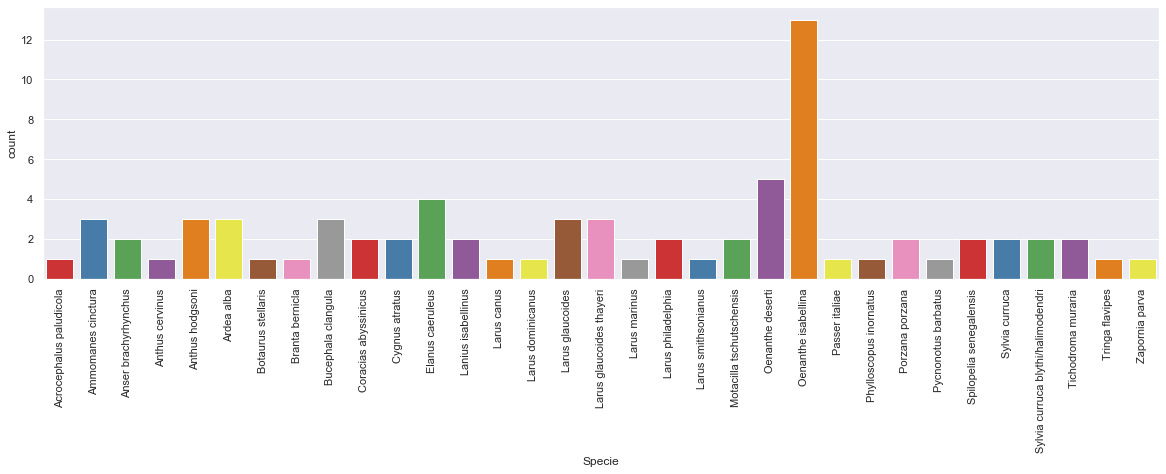

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
chart = sns.countplot(
    data=df,
    x='Specie',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [8]:
df.to_csv('reservoibirds.csv')